#University of Waterloo

#ECE 675: Pattren Recognition-Winter2022

#Research_Project_Code

**Modified By: Huda Diab Abdulgalil, UWaterloo ID: 20644888, UWaterloo email:hdiababd@uwaterloo.ca**


In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 248 kB 5.6 MB/s 
     |████████████████████████████████| 1.7 MB 42.6 MB/s 
     |████████████████████████████████| 3.8 MB 40.1 MB/s 
     |████████████████████████████████| 9.9 MB 31.5 MB/s 
     |████████████████████████████████| 6.5 MB 34.4 MB/s 
     |████████████████████████████████| 325 kB 59.5 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 37.6 MB/s 
     |████████████████████████████████| 895 kB 27.9 MB/s 
     |████████████████████████████████| 596 kB 27.9 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 144 kB 52.6 MB/s 
     |████████████████████████████████| 181 kB 47.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 212 kB 48.1 MB/s 
     |████████████████████████████████| 1.1 MB 40.0 MB/s 
     |████████████████████████████████| 134 kB 47.0 MB/s 
     |███████████████

In [ ]:
!pip install transformers

In [ ]:
!pip install pyyaml==5.3.1

     |████████████████████████████████| 269 kB 4.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=0774142a3bb095fbd492108914334a45cfee6573c36e2b6cfacafe2b68f3313b
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
!pip install -q xlrd

In [38]:
!pip install scikit-plot

In [ ]:
pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
base58                        2.1.1
beautifulsoup4                4.6.3
bleach                        4.1.0
blink

#Machine Learning Models:

#DataSet 1: 

In [1]:
#load and read the dataset
import io
import pandas as pd
#import packages to use
from google.colab import files
data = files.upload()


Saving ProjectDatasetSample.xlsx to ProjectDatasetSample.xlsx


In [2]:
xlsx_file = io.BytesIO(data.get('ProjectDatasetSample.xlsx'))
df = pd.read_excel('ProjectDatasetSample.xlsx', 'Gegevens')
df.head()

,ReportText,Label
0,X pols rechts \n\nOpname van de rechterpols in...,1
1,X voet/tenen links \n\n\nOpname van de linkerv...,0
2,X enkel rechts \n\n\nOpname van de rechterenke...,0
3,X pols links \n\n\nOpname van de linkerpols in...,0
4,X voet/tenen rechts \n\n\nOpname van de rechte...,0


In [3]:
#df = df[['ReportTextText', 'Result_Infiltraat']]
df = df[['ReportText', 'Label']]
print(df)

                                             ReportText  Label
0     X pols rechts \n\nOpname van de rechterpols in...      1
1     X voet/tenen links \n\n\nOpname van de linkerv...      0
2     X enkel rechts \n\n\nOpname van de rechterenke...      0
3     X pols links \n\n\nOpname van de linkerpols in...      0
4     X voet/tenen rechts \n\n\nOpname van de rechte...      0
...                                                 ...    ...
2465  Val van fiets. Mogelijk geluxeerd geweest. Fra...      1
2466  X voet/tenen links \nX enkel links \n\n\nNorma...      0
2467  X elleboog rechts \nTwee richtingen.\nGeen ond...      1
2468  X hand/vingers rechts \n\nCorticaal knikje met...      1
2469  X knie rechts \n\nNormaal wijde gewrichtssplee...      0

[2470 rows x 2 columns]


#Data pre-processing:
Remove Blank rows in Data, if any
Change all the text to lower case
Word Tokenization
Remove Stop words
Remove Non-alpha text
Word Lemmatization

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import sklearn.metrics
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')
#used to remove the necessity of calling show after each plot.
%matplotlib inline

In [5]:
#look at the data shape through shape, which shows the number of data sample, and number of variable.
df.shape

(2470, 2)

In [6]:
#look at the target column "target" (class distribution) using through groupby and size
df.groupby('Label').size()

Label
0    1570
1     900
dtype: int64

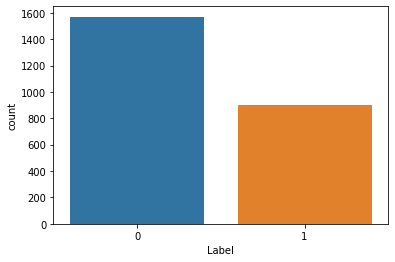

In [7]:
#lets use sns and count the number of observations of each tatget, to figureout if we hava a balanced data
sns.countplot(data= df, x='Label')

In [8]:
#reproduce the same result every time if the script is kept consistent otherwise each run will produce different results
np.random.seed(500)

In [9]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# Step - a : Remove blank rows if any.
df['ReportText'].dropna(inplace=True)

In [11]:
# Step - b : Change all the text to lower case.
df['ReportText']= [entry.lower() for entry in df['ReportText']]

In [12]:
# Step - c : Tokenization : In this each entry in the report will be broken into set of words
df['ReportText']= [word_tokenize(entry) for entry in df['ReportText']]

In [13]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['ReportText']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)

In [14]:
df.head()

,ReportText,Label,text_final
0,"[x, pols, rechts, opname, van, de, rechterpols...",1,"['x', 'pol', 'rechts', 'opname', 'van', 'de', ..."
1,"[x, voet/tenen, links, opname, van, de, linker...",0,"['x', 'link', 'opname', 'van', 'de', 'linkervo..."
2,"[x, enkel, rechts, opname, van, de, rechterenk...",0,"['x', 'enkel', 'rechts', 'opname', 'van', 'de'..."
3,"[x, pols, links, opname, van, de, linkerpols, ...",0,"['x', 'pol', 'link', 'opname', 'van', 'de', 'l..."
4,"[x, voet/tenen, rechts, opname, van, de, recht...",0,"['x', 'rechts', 'opname', 'van', 'de', 'rechte..."


*STEP -5: Prepare Train and Test Data sets*

In [15]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_final'],df['Label'],test_size=0.2)

*STEP -6: Encoding*

In [16]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

*STEP -7: Word Vectorization*

In [17]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [18]:
#syntax to see the vocabulary 
print(Tfidf_vect.vocabulary_)

{'pol': 1721, 'rechts': 1851, 'opname': 1574, 'van': 2267, 'de': 515, 'rechterpols': 1844, 'twee': 2214, 'richtingen': 1889, 'geen': 848, 'eerder': 659, 'onderzoek': 1521, 'ter': 2126, 'vergelijk': 2311, 'hoogte': 1050, 'distale': 586, 'radius': 1810, 'lucent': 1318, 'ophelderingslijntje': 1571, 'zonder': 2518, 'aanwijzingen': 26, 'voor': 2413, 'cortexdoorbraak': 462, 'beeld': 213, 'passend': 1651, 'bij': 294, 'fissuur': 780, 'verder': 2305, 'intacte': 1134, 'ossale': 1594, 'structuren': 2052, 'meet': 1371, 'normale': 1478, 'corticale': 467, 'begrenzingen': 222, 'traumatische': 2197, 'afwijkingen': 81, 'conclusie': 425, 'patiënt': 1668, 'werd': 2465, 'doorgestuurd': 598, 'naar': 1442, 'seh': 1958, 'link': 1280, 'linkervoet': 1297, 'botstructuur': 339, 'en': 682, 'kalkhoudendheid': 1176, 'intact': 1133, 'enkel': 687, 'rechterenkel': 1836, 'congruent': 432, 'enkelgewricht': 693, 'uitgebreide': 2230, 'weke': 2453, 'delenzwelling': 533, 'laterale': 1250, 'malleolus': 1343, 'fibula': 771, '

*STEP -8: Use the ML Algorithms to Predict the outcome*

# NLP Based-Classification using Naive Bayes, SVM and Random Forest:

In [53]:
import sklearn.metrics
import math
def matrix_metrix(real_values,pred_values,beta):
   CM = confusion_matrix(real_values,pred_values)
   TN = CM[0][0]
   FN = CM[1][0] 
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   #FDR        = round( FP / (TP+FP),4 )
  #FOR        = round( FN / (TN+FN),4 ) 
   #check_Pos  = Precision + FDR
   #check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 ) 
   #check_Pos2 = Recall + FNR
   #check_Neg2 = FPR + TNR
   #LRPos      = round( Recall/FPR,4 ) 
   #LRNeg      = round( FNR / TNR ,4 )
   #DOR        = round( LRPos/LRNeg)
   F1_score         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   #FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   #MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   #BM         = Recall+TNR-1
   #MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','Recall','FPR','FNR','TNR','F1_score'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,Recall,FPR,FNR,TNR,F1_score]})
   return (mat_met)

**Naive Bayes Classifier Algorithm:**

In [19]:
# fit the training dataset on the NB classifier
NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = NB.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Precision:",metrics.precision_score(predictions_NB, Test_Y))
print("Naive Bayes Recall:",metrics.recall_score(predictions_NB, Test_Y))
print("NB:",metrics.classification_report(predictions_NB, Test_Y))
print("area under curve (auc): ", metrics.roc_auc_score(predictions_NB, Test_Y))

Naive Bayes Accuracy Score ->  93.11740890688259
Naive Bayes Precision: 0.8277777777777777
Naive Bayes Recall: 0.9802631578947368
NB:               precision    recall  f1-score   support

           0       0.99      0.91      0.95       342
           1       0.83      0.98      0.90       152

    accuracy                           0.93       494
   macro avg       0.91      0.94      0.92       494
weighted avg       0.94      0.93      0.93       494

area under curve (auc):  0.9448099415204677


**Confusion_Matrix of Naive Bayes Classifier Algorithm:**

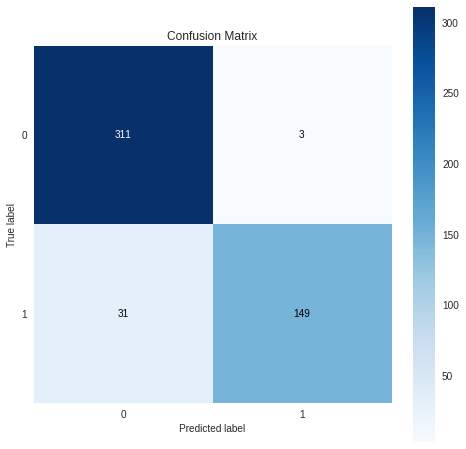

In [58]:
#print(confusion_matrix(Test_Y, predictions_NB))
skplt.metrics.plot_confusion_matrix(Test_Y, predictions_NB,figsize=(8,8))

In [54]:
beta = 0.4
mat_met = matrix_metrix(Test_Y, predictions_NB,beta)
print (mat_met)

        Metric     Value
0           TP  149.0000
1           TN  311.0000
2           FP    3.0000
3           FN   31.0000
4   Prevalence    0.3100
5     Accuracy    0.9312
6    Precision    0.9803
7          NPV    0.9094
8       Recall    0.8278
9          FPR    0.0096
10         FNR    0.1722
11         TNR    0.9904
12    F1_score    0.8976


**Support Vector Machine Classifier Algorithm:**

In [23]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision:",metrics.precision_score(predictions_SVM, Test_Y))
print("SVM Recall:",metrics.recall_score(predictions_SVM, Test_Y))
print("SVM:",metrics.classification_report(predictions_SVM, Test_Y))
print("area under curve (auc): ", metrics.roc_auc_score(predictions_SVM, Test_Y))

SVM Accuracy Score ->  95.34412955465586
SVM Precision: 0.9
SVM Recall: 0.9700598802395209
SVM:               precision    recall  f1-score   support

           0       0.98      0.94      0.96       327
           1       0.90      0.97      0.93       167

    accuracy                           0.95       494
   macro avg       0.94      0.96      0.95       494
weighted avg       0.96      0.95      0.95       494

area under curve (auc):  0.9575070043399438


**Confusion_Matrix of Support Vector Machine Classifier Algorithm**

[[309   5]
 [ 18 162]]


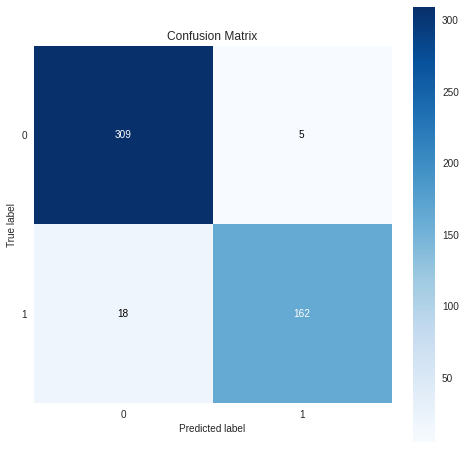

In [42]:
#print(confusion_matrix(Test_Y, predictions_SVM))
skplt.metrics.plot_confusion_matrix(Test_Y, predictions_SVM,figsize=(8,8))

In [55]:
beta = 0.4
mat_met = matrix_metrix(Test_Y, predictions_SVM,beta)
print (mat_met)

        Metric     Value
0           TP  162.0000
1           TN  309.0000
2           FP    5.0000
3           FN   18.0000
4   Prevalence    0.3400
5     Accuracy    0.9534
6    Precision    0.9701
7          NPV    0.9450
8       Recall    0.9000
9          FPR    0.0159
10         FNR    0.1000
11         TNR    0.9841
12    F1_score    0.9337


**Random Forest Classifier Algorithm:**

In [21]:
# Classifier - Algorithm - RF
# fit the training dataset on the classifier
RF = RandomForestClassifier(n_estimators=1000, random_state=0)
RF.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_RF = RF.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Random Forest Accuracy Score -> ",accuracy_score(predictions_RF, Test_Y)*100)
print("RF Precision:",metrics.precision_score(predictions_RF, Test_Y))
print("RF Recall:",metrics.recall_score(predictions_RF, Test_Y))
print("RF:",metrics.classification_report(predictions_RF, Test_Y))
print("area under curve (auc): ", metrics.roc_auc_score(predictions_RF, Test_Y))

Random Forest Accuracy Score ->  95.74898785425101
RF Precision: 0.9
RF Recall: 0.9818181818181818
RF:               precision    recall  f1-score   support

           0       0.99      0.95      0.97       329
           1       0.90      0.98      0.94       165

    accuracy                           0.96       494
   macro avg       0.95      0.96      0.95       494
weighted avg       0.96      0.96      0.96       494

area under curve (auc):  0.963553467808787


**Confusion_Matrix of Random Forest Classifier Algorithm**

[[311   3]
 [ 18 162]]


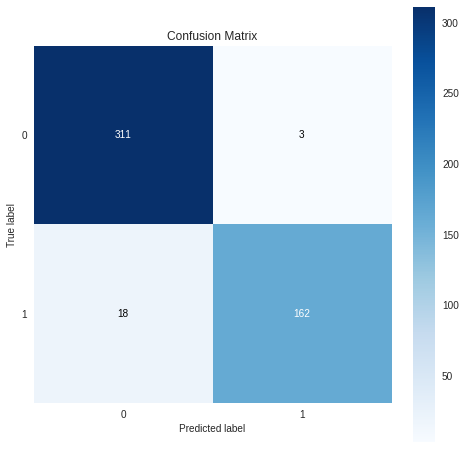

In [43]:
#print(confusion_matrix(Test_Y, predictions_RF))
skplt.metrics.plot_confusion_matrix(Test_Y, predictions_RF,figsize=(8,8))

In [56]:
beta = 0.4
mat_met = matrix_metrix(Test_Y, predictions_RF,beta)
print (mat_met)

        Metric     Value
0           TP  162.0000
1           TN  311.0000
2           FP    3.0000
3           FN   18.0000
4   Prevalence    0.3300
5     Accuracy    0.9575
6    Precision    0.9818
7          NPV    0.9453
8       Recall    0.9000
9          FPR    0.0096
10         FNR    0.1000
11         TNR    0.9904
12    F1_score    0.9391


In [24]:
# predict probabilities
pred_prob1 = NB.predict_proba(Test_X_Tfidf)
pred_prob2 = SVM.predict_proba(Test_X_Tfidf)
pred_prob3 = RF.predict_proba(Test_X_Tfidf)

In [57]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Test_Y, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Test_Y, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Test_Y, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Test_Y))]
p_fpr, p_tpr, _ = roc_curve(Test_Y, random_probs, pos_label=1)
#print("SVM Recall:",metrics.recall_score(predictions_SVM, Test_Y)fpr1, tpr1)
#print("NB fpr, tpr:",fpr1, tpr1)
##print("RF fpr, tpr:",fpr3, tpr3)

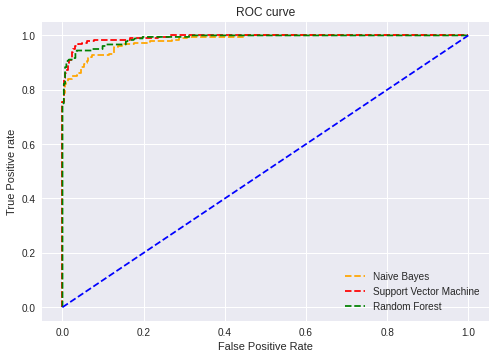

In [27]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Support Vector Machine')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

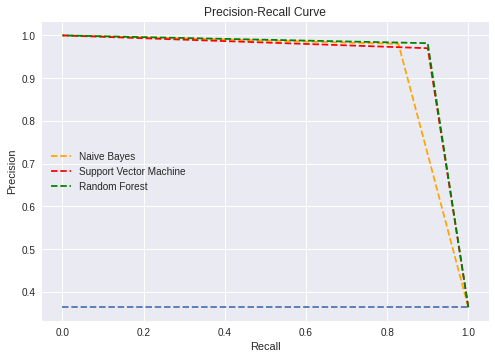

In [47]:
#Precision-recall implementation
precision1, recall1, thresholds1 = sklearn.metrics.precision_recall_curve(Test_Y, predictions_NB)
precision2, recall2, thresholds2 = sklearn.metrics.precision_recall_curve(Test_Y, predictions_SVM)
precision3, recall3, thresholds3 = sklearn.metrics.precision_recall_curve(Test_Y, predictions_RF)

plt.style.use('seaborn')
# plot the precision-recall curves
no_skill = len(Test_Y[Test_Y==1]) / len(Test_Y)
plt.plot(recall1, precision1, linestyle='--', color='orange', label='Naive Bayes')
plt.plot(recall2, precision2, linestyle='--', color='red', label='Support Vector Machine')
plt.plot(recall3, precision3, linestyle='--', color='green', label='Random Forest')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
# title
plt.title('Precision-Recall Curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')

plt.legend(loc='best')
plt.savefig('Precision-Recall Curve',dpi=500)
plt.show();


#Naive Bayes:

In [ ]:
xlsx_file = io.BytesIO(data.get('ProjectDatasetSample.xlsx'))
df1 = pd.read_excel('ProjectDatasetSample.xlsx', 'Gegevens')
df1.head()

,ReportText,Label
0,X pols rechts \n\nOpname van de rechterpols in...,1
1,X voet/tenen links \n\n\nOpname van de linkerv...,0
2,X enkel rechts \n\n\nOpname van de rechterenke...,0
3,X pols links \n\n\nOpname van de linkerpols in...,0
4,X voet/tenen rechts \n\n\nOpname van de rechte...,0


In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['ReportText'], df1['Label'], random_state=1)

In [ ]:
#Convert report into word count vectors
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Fit the model and make predictions
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [ ]:
#the model performed on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:', accuracy_score(y_test, predictions))
print('Precision score:', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy score: 0.9368932038834952
Precision score: 0.9008620689655172
Recall score:  0.9288888888888889


In [ ]:
print("NB:",metrics.classification_report(y_test, predictions))
print("area under curve (auc): ", metrics.roc_auc_score(y_test, predictions))

NB:               precision    recall  f1-score   support

           0       0.96      0.94      0.95       393
           1       0.90      0.93      0.91       225

    accuracy                           0.94       618
   macro avg       0.93      0.94      0.93       618
weighted avg       0.94      0.94      0.94       618

area under curve (auc):  0.9351823579304496


#Deep Learning Models:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from simpletransformers.classification import ClassificationModel
import logging
from datetime import datetime
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import keras.backend as K

In [ ]:
# Define variables
vocab_size = 2500 #1000
embedding_dim = 32 #16
max_length = 250 #150 #120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size_perc = 0.8 ##2200
num_epochs_number = 12
dataset_stepsize = 100 #250
dataset_stepsize_TEST = 40
use_small_sample_perc = 1 # < 1 to us small sample of dataset for testing purpose
path = '[path]'

In [ ]:
#prepare train-test-sets
#df pos neg split
#df_pos = df.query('Result_Infiltraat == 1')
#df_neg = df.query('Result_Infiltraat == 0')
df_pos = df.query('Label == 1')
df_neg = df.query('Label == 0')

# shuffle
df_pos_shuf = shuffle(df_pos)
df_neg_shuf = shuffle(df_neg)
#split train test
nr_pos = len(df_pos_shuf)
nr_neg = len(df_neg_shuf)
nr_train_pos = int(training_size_perc * nr_pos )
nr_train_neg = int(training_size_perc * nr_neg )
df_pos_TRAIN = df_pos_shuf.iloc[0:nr_train_pos]
df_pos_TEST = df_pos_shuf.iloc[nr_train_pos:]
df_neg_TRAIN = df_neg_shuf.iloc[0:nr_train_neg]
df_neg_TEST = df_neg_shuf.iloc[nr_train_neg:]
df_TEST = pd.concat([df_pos_TEST, df_neg_TEST])


In [ ]:
#safe dataset
#Filename1 = 'df_TEST_THORAX_20201006'
#df_TEST.to_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename1+".xlsx")
Filename1 = 'df_TEST_THORAX_20201006'
df_TEST.to_excel("Filename1.xlsx")

In [ ]:
Filename2 = 'df_pos_TRAIN_THORAX_20201006'
#df_pos_TRAIN.to_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename2+".xlsx")
df_pos_TRAIN.to_excel("Filename2.xlsx")
Filename3= 'df_neg_TRAIN_THORAX_20201006'
#df_neg_TRAIN.to_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename3+".xlsx")
df_neg_TRAIN.to_excel("Filename3.xlsx")

In [ ]:

#def make_list_Pos_Neg_N(pos, neg, dataset_stepsize):
list_Pos_N = [*range(dataset_stepsize, nr_train_pos, dataset_stepsize)]
#list_Pos_N.append(pos) # add largest number of positive cases
list_Neg_N = [*range(dataset_stepsize, nr_train_neg, dataset_stepsize)]
#list_Neg_N.append(neg) # add largest number of negative cases
#return(list_Pos_N, list_Neg_N)
#prepare results dataframe
Training_combinations = pd.DataFrame(columns=['Dataset_ID', 'Pos', 'Neg', 'Training_size', 'Prevalence'])
teller=1
for i in list_Pos_N:
    for ii in list_Neg_N:
        ID = teller
        Pos = round(i ,0)
        Neg = round(ii, 0)
        Size = round((i + ii),0)
        Prev = round( (i/ (i + ii)), 2)
        Training_combinations.loc[teller] = (ID, Pos, Neg, Size, Prev)
        teller = teller + 1
print(Training_combinations)


    Dataset_ID    Pos     Neg  Training_size  Prevalence
1          1.0  100.0   100.0          200.0        0.50
2          2.0  100.0   200.0          300.0        0.33
3          3.0  100.0   300.0          400.0        0.25
4          4.0  100.0   400.0          500.0        0.20
5          5.0  100.0   500.0          600.0        0.17
..         ...    ...     ...            ...         ...
80        80.0  700.0   800.0         1500.0        0.47
81        81.0  700.0   900.0         1600.0        0.44
82        82.0  700.0  1000.0         1700.0        0.41
83        83.0  700.0  1100.0         1800.0        0.39
84        84.0  700.0  1200.0         1900.0        0.37

[84 rows x 5 columns]


In [ ]:
from google.colab import files
files.download('Filename1.xlsx')
files.download('Filename2.xlsx')
files.download('Filename3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Filename4 = 'Training_combinations_THORAX_20201006'
#Training_combinations.to_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename4+".xlsx")
Training_combinations.to_excel("Filename4.xlsx")
#append info to results

In [ ]:
from google.colab import files
files.download('Filename4.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df)

                                             ReportText  Label
0     X pols rechts \n\nOpname van de rechterpols in...      1
1     X voet/tenen links \n\n\nOpname van de linkerv...      0
2     X enkel rechts \n\n\nOpname van de rechterenke...      0
3     X pols links \n\n\nOpname van de linkerpols in...      0
4     X voet/tenen rechts \n\n\nOpname van de rechte...      0
...                                                 ...    ...
2465  Val van fiets. Mogelijk geluxeerd geweest. Fra...      1
2466  X voet/tenen links \nX enkel links \n\n\nNorma...      0
2467  X elleboog rechts \nTwee richtingen.\nGeen ond...      1
2468  X hand/vingers rechts \n\nCorticaal knikje met...      1
2469  X knie rechts \n\nNormaal wijde gewrichtssplee...      0

[2470 rows x 2 columns]


In [ ]:
#count the word in the report
df['WordCount'] = df['ReportText'].str.split().str.len()

In [ ]:
df_WORDS = df['WordCount'].value_counts()

In [ ]:
print(df_WORDS)

7      233
14     111
12      91
5       72
16      71
      ... 
148      1
121      1
122      1
95       1
132      1
Name: WordCount, Length: 118, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReportText  2470 non-null   object
 1   Label       2470 non-null   int64 
 2   WordCount   2470 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.0+ KB


In [ ]:
import plotly.express as px
#df.sort_values(by=['Result_Infiltraat'], inplace=True, ascending=False)
#fig = px.histogram(df, x="WordCount", color="Result_Infiltraat")
df.sort_values(by=['Label'], inplace=True, ascending=False)
fig = px.histogram(df, x="WordCount", color="Label")
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
print(df_TEST)

                                             ReportText  Label
1255  Distale radius? Wijsvinger?\n\nX hand/vingers ...      1
898   X knie links\n\nIntra-articulaire proximale ti...      1
1780  X pols links \n\nFractuur distale radiusmetafy...      1
42    X pols/onderarm rechts \n\n\nDistale antebrach...      1
996   X hand/vingers rechts \n\nFractuur middenphala...      1
...                                                 ...    ...
1576  X enkel links \n\nNormale kalkhoudendheid en b...      0
1327  X elleboog rechts\n\nGeen posttraumatische oss...      0
907   X elleboog rechts \n\nNormale articulatio en g...      0
1994  X voet/tenen rechts \n\nGeen fractuur of luxatie.      0
1095  X pols links\n\nGeen posttraumatische ossale p...      0

[494 rows x 2 columns]


In [ ]:
print(list_Pos_N, list_Neg_N)

[100, 200, 300, 400, 500, 600, 700] [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


#Models

#"Dense", "LSTM", and "CNN" Models:

In [ ]:
def make_and_compile_models():


  model_Rnn = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, name='Embedding'),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), name='LSTM-1'), #32
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), name='LSTM-2'),
  tf.keras.layers.Dense(64, activation='relu', name='Dense-1'), #24
  tf.keras.layers.Dense(1)
  ])

  model_Rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model_Rnn.summary()



  return(model_Rnn)

#Def's

In [ ]:
def make_datastore_train(nr, Training_combinations, df_pos_TRAIN, df_neg_TRAIN):
  pos = Training_combinations.loc[nr]['Pos']
  neg = Training_combinations.loc[nr]['Neg']
  temp_pos = df_pos_TRAIN.loc[0:pos]
  temp_neg = df_neg_TRAIN.loc[0:neg]
  datastore_train = pd.concat([temp_pos, temp_neg])
  datastore_train = shuffle(datastore_train)
  return(datastore_train)
def make_trainset_from_datastore_train_and_testset_from_df_TEST(datastore_train, df_TEST):
  training_sentences_fixed = []
  training_labels_fixed = []
  #teller = 0
  for item in range(len(datastore_train)):
      #print(teller)
      #print('item=',item)
      temp_train = datastore_train.iloc[item]
      training_sentences_fixed.append(temp_train['ReportText'])
      #print('sentences=',sentences)
      training_labels_fixed.append(temp_train['Label'])
      #print('labels=',labels)
      #teller = teller +1
  tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
  tokenizer.fit_on_texts(training_sentences_fixed)
  word_index = tokenizer.word_index
  training_sequences_fixed = tokenizer.texts_to_sequences(training_sentences_fixed)
  training_padded_fixed = pad_sequences(training_sequences_fixed, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  #make test datasets with tokenized reports
  testing_sentences_fixed = []
  testing_labels_fixed = []
  for item in range(len(df_TEST)):
      temp_test = df_TEST.iloc[item]
      testing_sentences_fixed.append(temp_test['ReportText'])
      testing_labels_fixed.append(temp_test['Label'])
      # tokenizer en word-index van trainingset
      #word_index = tokenizer.word_index van trainingset
      testing_sequences_fixed = tokenizer.texts_to_sequences(testing_sentences_fixed)
      testing_padded_fixed = pad_sequences(testing_sequences_fixed, maxlen=max_length, padding=padding_type, truncating=trunc_type)
      Tokenizer_Ext = tokenizer
  return(training_padded_fixed, training_labels_fixed, testing_padded_fixed, testing_labels_fixed, Tokenizer_Ext)

In [ ]:

# train models(RNN) and return histories
def train_models(training_padded, training_labels, testing_padded, testing_labels, model_Rnn):
  num_epochs = num_epochs_number # 50
  training_padded = np.array(training_padded)
  training_labels = np.array(training_labels)
  testing_padded = np.array(testing_padded)
  testing_labels = np.array(testing_labels)
  #history1 = model_dense.fit(training_padded, training_labels, epochs=num_epochs, verbose=2, use_multiprocessing = False)
  history = model_Rnn.fit(training_padded, training_labels, epochs=num_epochs, verbose=2, use_multiprocessing = False)
  #history3 = model_cnn.fit(training_padded, training_labels, epochs=num_epochs, verbose=2, use_multiprocessing = False)
  return(history)

In [ ]:
#evaluation
def eval_model(model_nr, testing_padded_fixed, testing_labels_fixed):
  y_pred1 = model_nr.predict(testing_padded_fixed)
  y_true = testing_labels_fixed
  y_pred1_rounded = np.around(y_pred1) #convert prediction to 0/1 labels
  precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred1_rounded)
  fscore_0 = fscore[0]
  f1_score = fscore[1]
  npv = precision[0]
  ppv = precision[1]
  spec = recall[0]
  sens = recall[1]
  auc = roc_auc_score(y_true, y_pred1_rounded)
  return(sens, spec, ppv, npv, auc, f1_score)


In [ ]:
# overview of models
model_Rnn_graph = make_and_compile_models()

2022-03-21 15:06:37.610380: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 250, 32)           80000     
                                                                 
 LSTM-1 (Bidirectional)      (None, 250, 128)          49664     
                                                                 
 Dense-1 (Dense)             (None, 250, 64)           8256      
                                                                 
 dense (Dense)               (None, 250, 1)            65        
                                                                 
Total params: 137,985
Trainable params: 137,985
Non-trainable params: 0
_________________________________________________________________


#Experiments

In [ ]:
Filename1 = 'df_TEST_THORAX_20201006'
Filename2 = 'df_pos_TRAIN_THORAX_20201006'
Filename3= 'df_neg_TRAIN_THORAX_20201006'
Filename4 = 'Training_combinations_THORAX_20201006'
#Training_combinations = pd.read_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename4+".xlsx")
#df_TEST = pd.read_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename1+".xlsx")
#df_pos_TRAIN = pd.read_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename2+".xlsx")
#df_neg_TRAIN = pd.read_excel(path+'/Jupyter_NLP_thoraxdataset/Data/'+Filename3+".xlsx")

In [ ]:
from google.colab import files
data = files.upload()


Saving Filename1 (2).xlsx to Filename1 (2).xlsx


In [ ]:
xlsx_file = io.BytesIO(data.get('Filename1.xlsx'))
df_TEST = pd.read_excel('Filename1.xlsx')

In [ ]:
from google.colab import files
data = files.upload()


Saving Filename2 (2).xlsx to Filename2 (2).xlsx


In [ ]:
xlsx_file = io.BytesIO(data.get('Filename2.xlsx'))
df_pos_TRAIN= pd.read_excel('Filename2.xlsx')

In [ ]:
from google.colab import files
data = files.upload()


Saving Filename3 (2).xlsx to Filename3 (2).xlsx


In [ ]:
xlsx_file = io.BytesIO(data.get('Filename3.xlsx'))
df_neg_TRAIN = pd.read_excel('Filename3.xlsx')

In [ ]:
from google.colab import files
data = files.upload()


Saving Filename4 (2).xlsx to Filename4 (2).xlsx


In [ ]:
xlsx_file = io.BytesIO(data.get('Filename4.xlsx'))
Training_combinations = pd.read_excel('Filename4.xlsx')

In [ ]:
#Dense, LSTM, CNN

Evaluation = pd.DataFrame(columns=['ID','Nr', 'Training_size', 'Prevalence', 'Model', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'AUC', 'F1_score'])
eerste = 28 #
laatste = 29 # 1 extra dan einde
histories=pd.DataFrame()
Count = 0
for j in range(eerste, laatste):
    nr = j - 1
    datastore_train = make_datastore_train(nr, Training_combinations, df_pos_TRAIN, df_neg_TRAIN)
    training_padded_fixed, training_labels_fixed, testing_padded_fixed, testing_labels_fixed, Tokenizer_Ext = make_trainset_from_datastore_train_and_testset_from_df_TEST(datastore_train, df_TEST)
    model_Rnn = make_and_compile_models()
    history1 = train_models(training_padded_fixed, training_labels_fixed, testing_padded_fixed, testing_labels_fixed,model_Rnn)
    Models = [model_Rnn]
    Model_names = ['RNN']
    prev = Training_combinations.loc[nr]['Prevalence']
    size = Training_combinations.loc[nr]['Training_size']
    print('prev=', prev)
    print('size=', size)
    print('nr=', nr)
    for iii in range(len(Models)): #loop over model evaluation with prediction
        Count = Count+1
        print(Count)
        model = Models[iii]
        modelname = Model_names[iii]
        sens, spec, ppv, npv, auc, f1_score = eval_model(model, testing_padded_fixed, testing_labels_fixed)
        Evaluation.loc[Count] = (Count, j, size, prev, modelname, sens, spec, ppv, npv, auc, f1_score )
    now = datetime.now()
    dt_string = now.strftime("%Y%m%d_%H%M")
    filename5 = 'Evaluation_'+dt_string
    print('filename5=', filename5)
    #Evaluation.to_excel(path+'/Jupyter_NLP_thoraxdataset/Data/History/'+filename5 +'.xlsx')
    
    Evaluation.to_excel("Filename5.xlsx")
    hist1 = pd.DataFrame(history1.history)
    hist1['model']='Rnn'
    hist1['size']=size
    hist1['prev']=prev
    histories = pd.concat([histories, hist1])
    #histories.to_excel(path+'/Jupyter_NLP_thoraxdataset/Data/History/'+'histories'+filename5+'.xlsx')
    filename6 = 'histories'+filename5
    histories.to_excel("Filename6.xlsx")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 250, 32)           80000     
                                                                 
 LSTM-1 (Bidirectional)      (None, 250, 128)          49664     
                                                                 
 Dense-1 (Dense)             (None, 250, 64)           8256      
                                                                 
 dense_4 (Dense)             (None, 250, 1)            65        
                                                                 
Total params: 137,985
Trainable params: 137,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
22/22 - 11s - loss: 1.1272 - accuracy: 0.5389 - 11s/epoch - 509ms/step
Epoch 2/12
22/22 - 7s - loss: 0.7007 - accuracy: 0.5467 - 7s/epoch - 300ms/step
Epoch 3/12
22/22 -

ValueError: ignored

In [ ]:
from google.colab import files
files.download('Filename5.xlsx')
files.download('Filename6.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('Filename7.xlsx')